# Monte Carlo and "the power of randomness"

In [5]:
import seaborn as sns
import numpy as np
import scipy as sci

import matplotlib.pyplot as plt

%matplotlib inline

### Throughing pebbles on the beach and estimatiing pi

The idea behind the program is that the ratio of the area of the  circle to the square area that inscribes it is $\pi/4$, so by counting the fraction of the random points in the square that are inside the circle, we get increasingly good estimates to $\pi$.

$$V_{c}/V_{s} = \pi r^2 / (2r)^2 = \frac{\pi}{4}$$

In [4]:
def circle_pi_estimate(N=10000, r0=10):
    '''Generate random points in the square with sides of -r0 and r0.
      Count the fraction of points falling inside the inscribed circle. Estimate pi
      '''
  
    # Generate random points
    xs = np.random.uniform(-r0, r0, size=N)
    ys = np.random.uniform(-r0, r0, size=N)

    #Convert points to boolean array corresdponding to points being inside vs outside
    pinside  = np.sqrt(xs**2 + ys**2) < r0 
    poutside = np.sqrt(xs**2 + ys**2) > r0
    
    pi_estimate = 4 * pinside.sum() / N 
    
    # Plots points 
    fig, ax=plt.subplots(figsize=(6,6))
    
    ax.plot(xs[pinside],  ys[pinside], 'b.') # points inside are blue
    ax.plot(xs[poutside], ys[poutside],'r.') # points outside are red
    ax.set_title(r"Estimation of $\pi$=" + f"{pi_estimate}", fontsize=20);

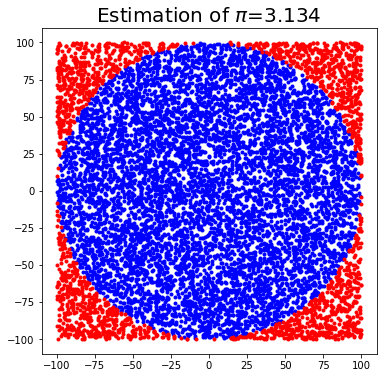

In [5]:
circle_pi_estimate(N=10000, r0=100)

### Shapes more complex than a circle

$$I = \int_0^2 \sin^2(\frac{1}{x(2-x)})dx$$

We will solve this problem using the same technique.  From the curve, we approximately could draw a rectangle to cover the curve in which x=[0,2], y = [0,1]. The area(volume for higher dimensions) of the rectangle is simply $A$=2. And the area under the curve is $I$ which appears to be difficult to solve. If we choose a point uniformly at random in the rectangle, What's the probability that the point falls into the region under the curve? It is obviously that $p$ = $I/A$.  

1. Generate a large number of $N$ random points in the bouding rectangle
2. Count number of points $n$ which are falling under the curve. 
3. Estimate area according to $I=Ap=A\frac{n}{N}$


In [19]:
def mc_integral(func, N=10000, Lx=2, Ly=1):
    '''Generate random points in the square with sides of -r0 and r0.
      Count the fraction of points falling inside the inscribed circle. Estimate pi
      '''
  
    # Generate uniform random numbers
    ux = Lx*np.random.rand(N) 
    uy = Ly*np.random.rand(N) 

    #Count accepted point.  
    pinside  = uy<func(ux)
    poutside = uy>func(ux)

    # Total area times fraction of sucessful points
    I = Lx*Ly*pinside.sum()/N 

    # Plots points
    plt.plot(ux[pinside],  uy[pinside],'o', color='red')
    plt.plot(ux[poutside], uy[poutside],'o', color='green')

    x = np.linspace(0.001, Lx,100)
    plt.plot(x, func(x), color='black', lw=2)

    plt.title(f'I =  {I:.4f} with N={N} samples',fontsize=12)

<ipython-input-20-3ac37c06a59e>:2: RuntimeWarning: divide by zero encountered in true_divide
  return ( np.sin(1/(x*(2-x))) )**2
<ipython-input-20-3ac37c06a59e>:2: RuntimeWarning: invalid value encountered in sin
  return ( np.sin(1/(x*(2-x))) )**2


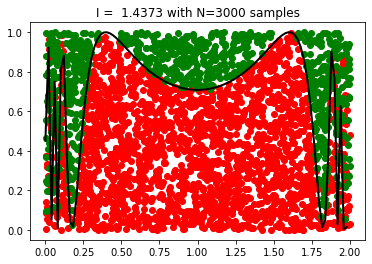

In [20]:
def f(x):
    return ( np.sin(1/(x*(2-x))) )**2

mc_integral(f, N=3000, Lx=2, Ly=1)

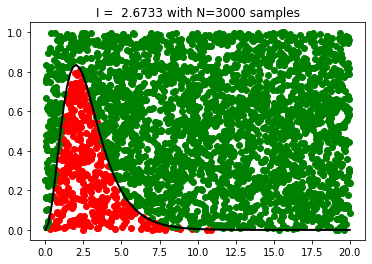

In [21]:
def f(x):
    return np.exp(-x)* x**2 + np.exp(-2*x)*x**4 

mc_integral(f, N=3000, Lx=20, Ly=1)

In [22]:
def mc_randnum_sample(func, N=10000, Lx=1, Ly=1):
    '''Sample random variables according to a distribution.
    func: given prob dist
    N:    random numbers used for sampling and rejection
    Lx, Ly range and domain size of distribution
    '''

    # uniform random samples
    ux =     Lx*np.random.rand(10000)
    uy =     Ly*np.random.rand(10000)  

    #rejection criteria
    idx = uy<=func(ux)          
    
    sampled_ux = ux[idx]

    ### Plotting    
    x = np.linspace(0, Lx, 100)

    plt.plot(x, func(x), lw=3)
    plt.hist(sampled_ux, density=True)

<ipython-input-23-2c0d9295cc34>:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-(x-1)**2/2./x)*(x+1)/12


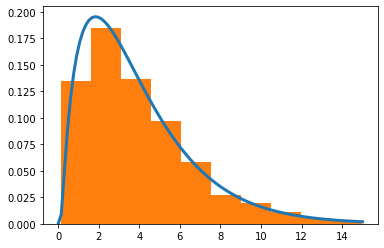

In [23]:
def f(x): 
    return np.exp(-(x-1)**2/2./x)*(x+1)/12

mc_randnum_sample(f, N=10000, Lx=15, Ly=0.25)

### Basic Idea behind Monte Carlo

The basic idea of Monte Carlo integration is simple. Suppose you want to find the value of the following integral in some region with volume $V$: 

$$I = \int_a^b f(x) dx$$

Monte Carlo integration estimates this integral by computing the fraction of random points that fall under $f(x)$  curve multiplied by $V$. In other words we are follwing the same procedure as for evaluating pi but this time our area is the area under some general function instead of a circle inscribed in a square. 

#### Computing expectations by drawing random numbers

Monte Carlo simulation allows us to numerically compute expectation $E[g(X)]$ of a function $g(x)$ by drawing n random numbers and computing sample means $\bar{g}_n$

$$
E[g(X)] = \int g(x) p(x) dx
$$

$$
\bar{g}_n = \frac{1}{n} \sum_{i=1}^n g(x_i)
$$

where points $x_i \sim p$ are draw from the probability density $p$.

#### Intuition for why MC beats brute force integration

Sine random variables are i.i.d we can use Central Limit Theorem toestimate the Monte Carlo variance of the approximation as 

$$
\sigma^2_n = \frac{1}{n^2} \sum_{i=1}^n (g(x_i) - \bar{g_n})^2)
$$

Also, according to Central Limit Theorem, expectation of sum of random variables scaled by standard deviaton tends to normal distribution:

$$
\frac{\bar{g_n} - E[g(X)]}{\sigma_n} \sim \mathcal{N}(0, 1)
$$
Therefore the convergence of Monte Carlo integration is $\mathcal{0}(n^{1/2})$ and independent of the dimensionality. Hence Monte Carlo integration generally beats numerical integration for moderate- and high-dimensional integration since numerical integration (quadrature) converges as $\mathcal{0}(n^{d})$. Even for low dimensional problems, Monte Carlo integration may have an advantage when the volume to be integrated is concentrated in a very small region and we can use information from the distribution to draw samples more often in the region of importance.

#### The essence of MC: Casting integrals as epexctations!

Let us take another look at an integral $I = \int{f(x)} \, dx$ with some simple rearrangement we can cast it in the form that looks like we are computing an expectation of sume function $g(x)$ with a probablity distribution $(x)$

$$I = \int{f(x)} \, dx = \int{\frac{f(x)}{p(x)} \, p(x) \, dx} = \int g(x) p(x)$$

$$
I = E[g(x)] = \int{g(x) \, p(x) \, dx}
$$

By the law of large numbers, the average converges on the expectation, so we have

$$
I \approx \bar{g_n} = \frac{1}{n} \sum_{i=1}^n g(x_i)
$$

Where random points $x_i$ are generated from the distribution $p(x)$. If $f(x)$ is a proper integral (i.e. bounded), and $p(x)$ is the uniform distribution on $[0,1]$, then $g(x) = f(x)$ and this is known as ordinary Monte Carlo. If the integral of $f(x)$ is improper, then we need to use another distribution with the same support as $f(x)$.

#### On variance Reduction
With independent samples $y_i = f(x_i)/p(x_i)$ the variance of the Monte Carlo estimate is

$$
\text{Var}[\bar{g_n}] = \text{Var} \left[ \frac{1}{n} \sum_i y_i \right ]= \frac{1}{n^2} \sum_{i=1}^{n} \text{Var}[y_i] = \frac{1}{n} \text{Var}[y_i]
$$

The objective is to make $\text{Var}[\bar{g_n}]\sim n^{-1}$ as small as possible for the same number of samples $n$.

There are several variance reduction techniques (also colorfully known as Monte Carlo swindles). We will illustrate one such powerful tecnique called the importance sampling technique.

In [7]:
def mc_int_1d(xlim, N, f):
    '''MC evaluation of 1D functions based on sampling from uniform distributions
    xlim: a tupe or list (xmin, xmax) containing boundaries of integration
    f: a function to be integrated/simulated
    N: number of samples to draw from
    '''
    
    assert len(xlim) == 2
    assert xlim[0] < xlim[1]
    
    x = np.random.uniform(xlim[0], xlim[1], N)
    
    integral = (xlim[1]-xlim[0]) * np.mean( f(x) )
    
    return integral


In [14]:
def f(x): return x**4 * np.exp(-2*x)

mc_int_1d((0,1), 10000, f)

0.03909447655890379

 #### Using Monte Carlo: evaluation of a definite integral

We want to estimate the following integral $I=\int_0^1 e^x dx$.

Text(0, 0.5, '$e^{x}$')

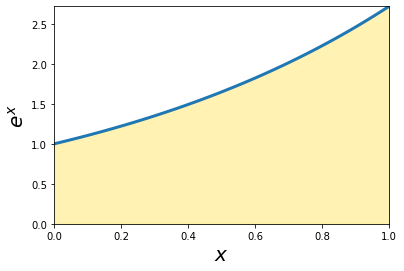

In [11]:
def f(x): return np.exp(x)

x = np.linspace(0, 1, 100)

plt.plot(x, f(x),linewidth=3.0)
plt.fill_between(x, f(x),color='gold',alpha=0.3)

plt.xlim([0,1])
plt.ylim([0, np.exp(1)])

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$e^{x}$',fontsize=20)

Now let us compare how MC integration compare with ordinary MC sampling.

In [12]:
from scipy import integrate

y, err = integrate.quad(np.exp, 0, 1)
print("Exact result:", y, err) 

for n in 10**np.array([1,2,3,4,5,6,7,8]):
    
    gn = mc_int_1d((0,1), 10000, f)
    
    print('N of samples: %10d %.6f' % (n, gn))

Exact result: 1.7182818284590453 1.9076760487502457e-14
N of samples:         10 1.717459
N of samples:        100 1.720667
N of samples:       1000 1.720170
N of samples:      10000 1.716234
N of samples:     100000 1.723718
N of samples:    1000000 1.711246
N of samples:   10000000 1.719475
N of samples:  100000000 1.725322


#### Example-3 of using Monte Carlo: monitoring the convergence (decresase of variance)

We are often interested in knowing how many iterations it takes for Monte Carlo integration to "converge". To do this, we would like some estimate of the variance, and it is useful to inspect such plots. One simple way to get confidence intervals for the plot of Monte Carlo estimate against number of iterations is simply to do many such simulations.

For the example, we will try to estimate the function (again)

$$
f(x) = x \cos 71 x + \sin 13x, \ \  0 \le x \le 1
$$

Text(0, 0.5, '$f(x)$')

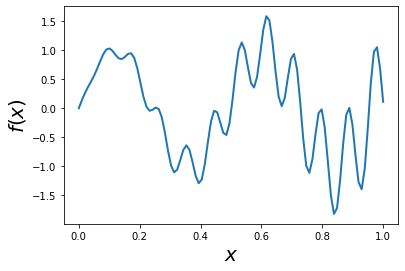

In [24]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

x = np.linspace(0, 1, 100)

plt.plot(x, f(x),linewidth=2.0)


plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$f(x)$',fontsize=20)

When we do a single run of MC we use one long sequence of unform random numbers

In [25]:
# sequence of n uniform random numbers
n = 100 
x = f(np.random.random(n))
y = 1.0/n * np.sum(x)
y

7.264142235219873e-05

We vary the sample size from 1 to 100 and calculate the value of $y = \sum{x}/n$ for 1000 replicates. We then plot the 2.5th and 97.5th percentile of the 1000 values of $y$ to see how the variation in $y$ changes with sample size. The blue lines indicate the 2.5th and 97.5th percentiles, and the red line a sample path.

Text(0.5, 0, 'Number of independent MC runs')

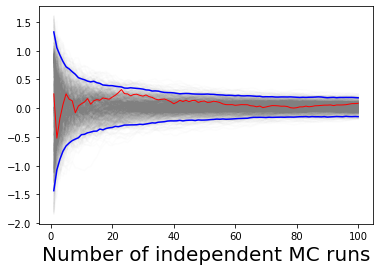

In [26]:
n = 100
reps = 1000

x = f(np.random.random((n, reps)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)

upper, lower = np.percentile(y, [2.5, 97.5], axis=1)


plt.plot(np.arange(1, n+1), y, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1);
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')

plt.xlabel('Number of independent MC runs',fontsize=20)

#### Importance sampling

Suppose we want to evaluate

$$
I = \int{h(x)\,p(x) \, dx}
$$
where $h(x)$ is some function and $p(x)$ is the PDF of $x$. If it is hard to sample directly from $p$, we can introduce a new density function  $q(x)$ that is easy to sample from, and write

$$
I = \int{h(x)\, p(x)\, dx} = \int{h(x)\, \frac{p(x)}{q(x)} \, q(x) \, dx}
$$
In other words, we sample from $h(y)$ where $y \sim q$ and weight it by the likelihood ratio $\frac{p(y)}{q(y)}$, estimating the integral as

$$
I \approx \frac{1}{n}\sum_{i=1}^n \frac{p(y_i)}{q(y_i)} h(y_i)
$$
Sometimes, even if we can sample from $p$ directly, it is more efficient to use another distribution.

#### Example of importance sampling

Suppose we want to estimate the tail probability of $\mathcal{N}(0, 1)$ for $P(X \gt 5)$. Regular MC integration using samples from $\mathcal{N}(0, 1)$ is hopeless since nearly all samples will be rejected. However, we can use the exponential density truncated at 5 as the importance function and use importance sampling. Note that $h$ here is simply the identify function.


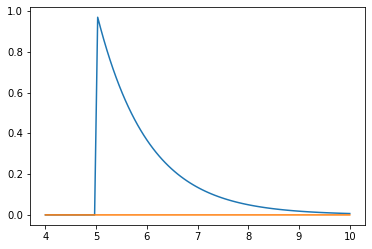

In [27]:
x = np.linspace(4, 10, 100)
plt.plot(x, sci.stats.expon(5).pdf(x))
plt.plot(x, sci.stats.norm().pdf(x))

We expect about 3 draws out of 10,000,000 from $\mathcal{N}(0, 1)$ to have a value greater than 5. Hence simply sampling from $\mathcal{N}(0, 1)$ is hopelessly inefficient for Monte Carlo integration.

In [28]:
v_true = 1 - sci.stats.norm().cdf(5)
v_true

2.866515719235352e-07

In [29]:
# using direct sampling with p(x)=N(0,1)

n = 10000
y = sci.stats.norm().rvs(n)
v_mc = 1.0/n * np.sum(y > 5)

# estimate and relative error
print('Direct MC & error:', v_mc, np.abs(v_mc - v_true)/v_true)

# using importance sampling with p(x)=exp(x)
n = 10000
y = sci.stats.expon(loc=5).rvs(n)
v_is = 1.0/n * np.sum(sci.stats.norm().pdf(y)/sci.stats.expon(loc=5).pdf(y))

# estimate and relative error
print('Direct IS MC & error:',v_is, np.abs(v_is- v_true)/v_true)

Direct MC & error: 0.0 1.0
Direct IS MC & error: 2.8880101052740655e-07 0.007498436479688064


### Markov Chain Monte Carlo

In [36]:
def mcmc_pi(N=1e5, delta=1.0):
    '''Using MCMC algorithm to estimate the value of pi'''
    
    pts = [] # array for points in square
    
    r_old = np.random.uniform(-1, 1, size=2) # 2 points within [0, 1] for x and y

    for i in range(N):
        
        dr = np.random.uniform(-delta, delta, size=2)
        
        r_new = r_old + dr
        
        if np.max(r_new) <= 1.0 and np.min(r_new) >= -1.0:
            
            pts.append(r_new)
            
            r_old = r_new
    
    pts  = np.array(pts)
    hits = pts[np.sqrt(pts[:,0]**2+pts[:,1]**2) < 1]
    
    return 4 * len(hits) / len(pts)

In [37]:
pi_value =  mcmc_pi(N=100000, delta=1.0)

print("Estimated Pi value is: ", pi_value)

Estimated Pi value is:  3.436731060268851


Text(0.5, 1.0, 'Mean: 3.4336, Var: 0.1834')

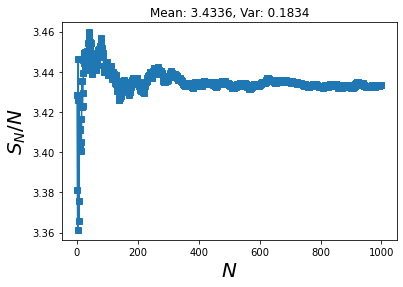

In [38]:
n_runs = np.arange(1,1001)
N = 100

#Estimate pi via a number of mcmc simulations
pi_vals      =  np.array([mcmc_pi(N) for i in n_runs] )
 
# Calculaate how mean improves with number of runs
sample_mean = np.cumsum(pi_vals )/n_runs

plt.plot(n_runs, sample_mean, '-s')

plt.xlabel('$N$',fontsize=20)
plt.ylabel('$S_N/N$', fontsize=20)

plt.title( f"Mean: {np.mean(pi_vals ):.4f}, Var: {np.std(pi_vals ):.4f}" )

### Problems

#### MC, the crude version

Evaluate the following integral $\int^{\infty}_0 \frac{e^{-x}}{1+(x-1)^2} dx$ using Monte Carlo methods. 
- Start by doing a direct monte carlo on uniform interval. 
- Try an importance sampling approach using en exponential probability distribution. 
- Find the optimal value of $\lambda $ that gives the most rapid reduction of variance [Hint: experiment with different values of $\lambda$]

#### MC method for evaluating 1D and 2D integrals

- Since you got some experience doing MC integrations maybe you feel like generalizing your apporach a bit. Can you write a function called mc_int(f, x0, x1, N) which does monte carlo integration of simple well behaved functions f over interval x0 to x1 using N unifrom distributed random numbers on $[x0, x1]$. You can also make do_mc() plot where the random points fell on the f(x) function in addition to returning the value of the evaluated integral.  

- Generalize your function to compute 2D integral mc_int(f, x0, x1, y0, y1 N). Test this function by computing simple rectangular shaped area functions, e.g $x_0=1, x_1 =3, y_0=1, y_1=5$